<a href="https://colab.research.google.com/github/carolines03/DS-project/blob/main/va_voting_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
###2020 Winning Party by County Map

import plotly.express as px
import requests
import pandas as pd
import matplotlib.pyplot as plt

va_data = pd.read_csv("/content/voting_VA.csv")

#geojson file
url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geojson = requests.get(url).json()

#filter VA counties
va_geojson = {
    "type": "FeatureCollection",
    "features": [
        feature for feature in geojson["features"] if feature["properties"]["STATE"] == "51"
    ],
}

#filter for 2020 data
va_2020 = va_data[va_data['year'] == 2020]
va_2020_grouped = (
    va_2020.groupby('county_fips', as_index=False)
    .apply(lambda df: df.loc[df['candidatevotes'].idxmax(), ['county_fips', 'party', 'totalvotes']])
    .reset_index(drop=True)
)

va_2020_grouped.columns = ['county_fips', 'party', 'totalvotes']

#map vis
fig = px.choropleth(
    va_2020_grouped,
    geojson=va_geojson,
    locations="county_fips",
    color="party",
    color_discrete_map={
        "DEMOCRAT": "#1f77b4",
        "REPUBLICAN": "#d62728",
        "OTHER": "gray"
    },
    labels={"party": "Winning Party", "totalvotes": "Total Votes"},
    hover_data={"totalvotes": ":,"},
    title="Virginia Counties by Winning Party (2020)"
)

fig.update_geos(fitbounds="locations", visible=False, projection_scale=5)
fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    title_x=0.5,
)

fig.show()


<ipython-input-30-b1973d7f94d3>:26: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<Figure size 1200x800 with 0 Axes>

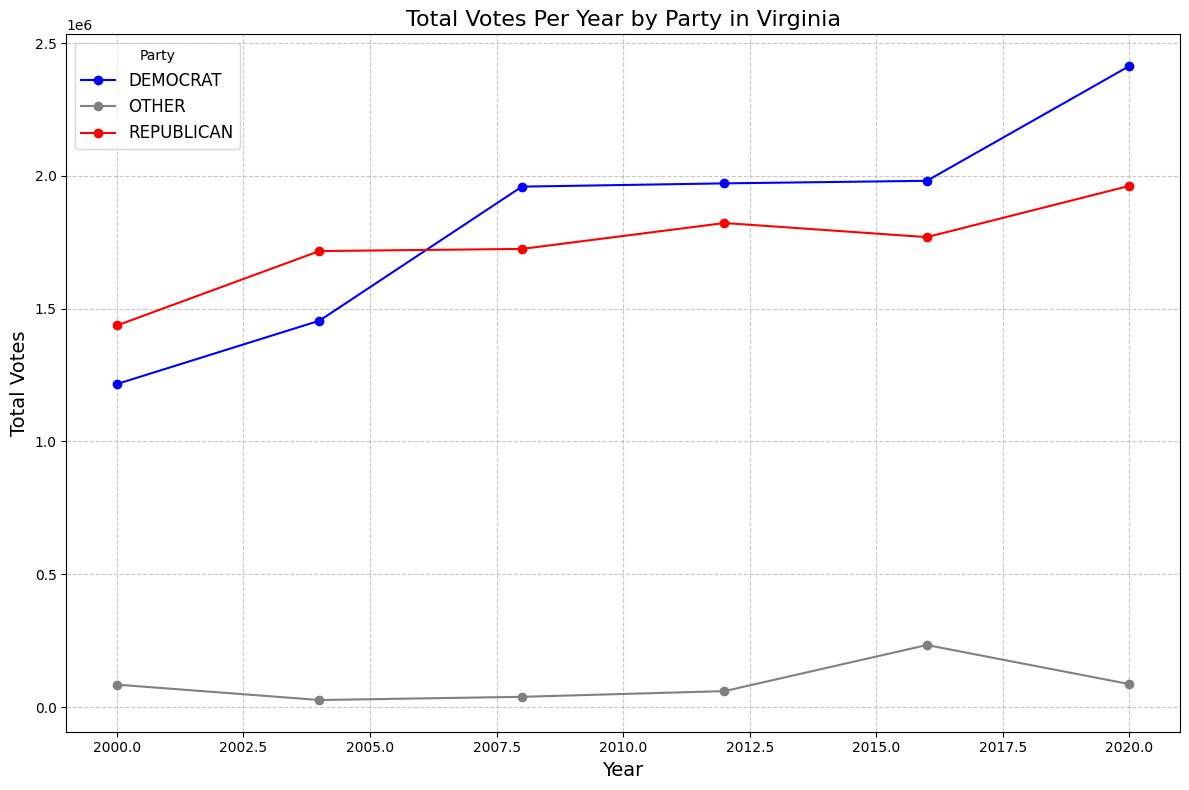

In [32]:
###Total Votes per Year by Party Line Graph

#make green and libertarian other
va_data['party'] = va_data['party'].replace({'GREEN': 'OTHER', 'LIBERTARIAN': 'OTHER'})

#grouped total votes
grouped_party_votes = va_data.groupby(['year', 'party'])['candidatevotes'].sum().unstack()

plt.figure(figsize=(12, 8))
grouped_party_votes.plot(kind='line', marker='o', figsize=(12, 8), color=['blue', 'gray', 'red'])

#labels and title
plt.title('Total Votes Per Year by Party in Virginia', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Votes', fontsize=14)
plt.legend(title='Party', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [33]:
###Total Votes per Year by Party Map (Interactive)

#group data
winning_party = (
    va_data.groupby(['year', 'county_fips', 'party'])['candidatevotes']
    .sum()
    .reset_index()
    .sort_values(by=['year', 'county_fips', 'candidatevotes'], ascending=[True, True, False])
    .drop_duplicates(subset=['year', 'county_fips'])
)

#party colors
party_color_map = {
    'DEMOCRAT': 'blue',
    'REPUBLICAN': 'red',
    'GREEN': 'green',
    'LIBERTARIAN': 'yellow',
    'OTHER': 'gray'
}

winning_party['color'] = winning_party['party'].map(party_color_map)

#choropleth map
fig = px.choropleth(
    winning_party,
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations="county_fips",
    color="party",
    hover_name="party",
    animation_frame="year",
    color_discrete_map=party_color_map,
    title="Winning Party by County in Virginia (by Year)",
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


In [34]:
###2024 Predicted Winning Party by County Map

predict_data = pd.read_csv("/content/county_predictions_2024.csv")

#geojson file
url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geojson = requests.get(url).json()

#filter geojson
va_geojson = {
    "type": "FeatureCollection",
    "features": [
        feature for feature in geojson["features"] if feature["properties"]["STATE"] == "51"
    ],
}

#ensure 'county_fips' is a string with 5 digits
predict_data['county_fips'] = predict_data['county_fips'].astype(str).str.zfill(5)

party_map = {1: "DEMOCRAT", 0: "REPUBLICAN"}
predict_data['party'] = predict_data['winner'].map(party_map)

#filter for 2024 data
va_2024 = predict_data[predict_data['year'] == 2024]

#choropleth map
fig = px.choropleth(
    va_2024,
    geojson=va_geojson,
    locations="county_fips",
    color="party",
    color_discrete_map={
        "DEMOCRAT": "#1f77b4",
        "REPUBLICAN": "#d62728",
    },
    labels={"party": "Winning Party"},
    hover_data={"county_name": True, "winner": True},
    title="Virginia Counties by Predicted Winning Party (2024)"
)

fig.update_geos(fitbounds="locations", visible=False, projection_scale=5)
fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    title_x=0.5,
)

fig.show()


In [35]:
###2024 Winning Party by County Map

results_data = pd.read_csv("/content/county_results_2024_w_fips.csv")

#geojson file
url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"
geojson = requests.get(url).json()

#filter geojson
va_geojson = {
    "type": "FeatureCollection",
    "features": [
        feature for feature in geojson["features"] if feature["properties"]["STATE"] == "51"
    ],
}

#ensure 'county_fips' is a string with 5 digits
results_data['county_fips'] = results_data['county_fips'].astype(str).str.zfill(5)

if 'winner' not in results_data.columns:
    results_data['winner'] = results_data[['DEMOCRAT', 'REPUBLICAN', 'OTHER']].idxmax(axis=1)

party_map = {1: "DEMOCRAT", 0: "REPUBLICAN"}
predict_data['party'] = predict_data['winner'].map(party_map)

results_data['party'] = results_data['winner'].map(party_map)

#choropleth map
fig = px.choropleth(
    results_data,
    geojson=va_geojson,
    locations="county_fips",
    color="party",
    color_discrete_map={
        "DEMOCRAT": "#1f77b4",
        "REPUBLICAN": "#d62728",
        "OTHER": "gray"
    },
    labels={"party": "winner"},
    hover_data={"COUNTY": True, "winner": True},
    title="Virginia Counties by Winning Party (2024)"
)

fig.update_geos(fitbounds="locations", visible=False, projection_scale=5)
fig.update_layout(
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    title_x=0.5,
)

fig.show()


Source: Utilized information from the plotly express website

https://plotly.com/python/

